**Instructions**  
1. pip install tdqm  for training because this is required for the progress bar built into the train() and make_conf_matrix() functions. 

2. Choose either to load the pre-trained model, or train from scratch, or pre-load 3 channel weights then convert network to 1 channel then train (by commenting out/commenting as necessary)

3. Review model outputs and evaluation. Uncomment relevant sections of the cells containing different models in order to re-create the experiments  


NB if using pre-loading of weights, care must be taken to reshape the networks using the code provided so that they are the right shape for the pre-trained weights - for the FER_Model__Final_Weights reshape first for 1 channel input but for the  vgg_vd_face_fer_dag (Albanie, 2016) weights available at http://www.robots.ox.ac.uk/~albanie/models/pytorch-mcn/vgg_vd_face_fer_dag.pth these are loaded first with the model as 3 channels and only then is the network reshaped for fine tuning on 1 channel

The code in this notebook is all original

In [1]:
import matplotlib.pyplot as plt

In [2]:
from utils import *
from models import *
from dataset import *

In [3]:
device = torch.device('cpu')
if torch.cuda.is_available():
   device = torch.device('cuda')
print(device)

cuda


Text(0, 0, '\n NB: Plot shows training data - the distribution\n (but not absolute number) is identical for validation and testing')

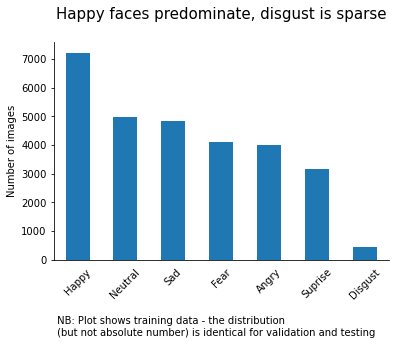

In [4]:
#display distribution of classes in trainset (it's the same distribution in valid and test)
dftrain=pd.read_csv('data/train.csv')
traincounts=dftrain['emotion'].value_counts() # count number of instances of each class in the dataset
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
lst=['Happy','Neutral','Sad', 'Fear','Angry', 'Suprise', 'Disgust']
traincounts.plot.bar()
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=lst, rotation=45)
plt.ylabel('Number of images')
plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False)
plt.title('Happy faces predominate, disgust is sparse\n', size=15)
plt.xlabel('\n NB: Plot shows training data - the distribution\n (but not absolute number) is identical for validation and testing', loc='left')

In [5]:
#create datasets
trainset = FER2013Dataset('data/train.csv')
validset = FER2013Dataset('data/valid.csv')
testset = FER2013Dataset('data/test.csv')

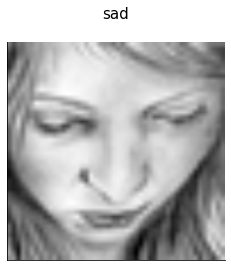

In [6]:
#display random image from dataset with label
display_rnd_img(trainset)

In [7]:
#create dataloaders
torch.backends.cudnn.benchmark = True
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=0, pin_memory = True, drop_last = True)
validloader = torch.utils.data.DataLoader(validset, batch_size=128,
                                          shuffle=True, num_workers=0, pin_memory = True, drop_last = True)
#NB batch_size of 1 required for make_conf_matrix function to work correctly (this model only)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                          shuffle=True, num_workers=0, pin_memory = True, drop_last = True)

**Create Models - only use cells relevant to those models as commented**

VGG Face Model - Pre-trained on VGG Facial Recognition then fine tuned on FER 2013  
The model itself is imported from the external module and was sourced from : https://www.robots.ox.ac.uk/~albanie/models/pytorch-mcn/vgg_vd_face_fer_dag.py

In [8]:
#create network
net = Vgg_vd_face_fer_dag()

# Load the FER_Model__Final_Weights  - taking care to reshape the network for one channel input first
net.conv1_1 = nn.Conv2d(1, 64, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1)) 
load_checkpoint('FER_Model__Final_Weights.pth', net, device)
# proceed directly to evaluation

# # ALTERNATIVELY train from scratch but you still need to convert to 1 channel
# net.conv1_1 = nn.Conv2d(1, 64, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1)) 
# net.fc8.out_features = 7 # change number of outputs to match number of FER2013 features
# net.fc8.bias = torch.nn.Parameter(torch.rand(net.fc8.out_features), requires_grad=True)
# net.fc8.weight = torch.nn.Parameter(torch.randn(7, 4096), requires_grad=True)

# #ALTERNATIVELY for training with transfer learning, load the weights from the Albanie trained 3 channel model (ref above)
# load_checkpoint('vgg_vd_face_fer_dag.pth', net, device)
# #Then amend network shape to make it suitable for 1 channel input (it already has 7 outputs). 
# net.conv1_1 = nn.Conv2d(1, 64, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1)) 
# net.fc8.out_features = 7 # change number of outputs to match number of FER2013 features
# net.fc8.bias = torch.nn.Parameter(torch.rand(net.fc8.out_features), requires_grad=True)
# net.fc8.weight = torch.nn.Parameter(torch.randn(7, 4096), requires_grad=True)
# #then train the new single output final layer, then evaluate

Model's pretrained weights loaded!


**Training**   
NB if evaluating pre-trained model skip this section

In [9]:
# #send net to device and set to train mode
# if device==torch.device('cuda'):
#     net = net.to(device)
# net.train()

In [10]:
# #define loss function and optimizer
# loss_function = nn.CrossEntropyLoss()
# optimizer = optim.Adam(net.parameters(), lr=0.00001)

In [11]:
##set n_epochs
# n_epochs=25

Example shown here is VGG Face pre-trained on face recognition (not FER), then tuned on FER 

In [12]:
# loss_history, valid_history = train(net, trainloader, validloader, n_epochs, loss_function, optimizer, device) # train network 
# #NB not required if evaluating pre-trained models

#Jupyter Notebook did not store cell output, so it is reproduced here

## Epoch= 0 CrossEntropyLoss =  1.2010434218208057 Valid CrossEntropyLoss =  0.5622490708317075
## Epoch= 1 CrossEntropyLoss =  0.8632708997258696 Valid CrossEntropyLoss =  0.8287668760333743
## Epoch= 2 CrossEntropyLoss =  0.6236874057882107 Valid CrossEntropyLoss =  0.7810981550386974
## Epoch= 3 CrossEntropyLoss =  0.3822956869778461 Valid CrossEntropyLoss =  0.3130392160798822
## Epoch= 4 CrossEntropyLoss =  0.22353707552847055 Valid CrossEntropyLoss =  0.07932023198476859
## Epoch= 5 CrossEntropyLoss =  0.1509681361073346 Valid CrossEntropyLoss =  0.021071829666782702
## Epoch= 6 CrossEntropyLoss =  0.11915569420306522 Valid CrossEntropyLoss =  0.11276629487318653
## Epoch= 7 CrossEntropyLoss =  0.10193934146506875 Valid CrossEntropyLoss =  0.0001225826283319163
## Epoch= 8 CrossEntropyLoss =  0.08788608115103329 Valid CrossEntropyLoss =  0.007986718643223867
## Epoch= 9 CrossEntropyLoss =  0.08182051937712542 Valid CrossEntropyLoss =  0.4732144224856581
## Epoch= 10 CrossEntropyLoss =  0.07282006193848109 Valid CrossEntropyLoss =  0.004788624725603897
## Epoch= 11 CrossEntropyLoss =  0.06943384458968262 Valid CrossEntropyLoss =  0.00889181810530967
## Epoch= 12 CrossEntropyLoss =  0.06417715402244936 Valid CrossEntropyLoss =  0.01610789759018059
## Epoch= 13 CrossEntropyLoss =  0.06513336806277459 Valid CrossEntropyLoss =  0.00751392100314011
## Epoch= 14 CrossEntropyLoss =  0.05605676186917364 Valid CrossEntropyLoss =  2.5301380820305246e-05
## Epoch= 15 CrossEntropyLoss =  0.05588802923817487 Valid CrossEntropyLoss =  0.028829422812642797
## Epoch= 16 CrossEntropyLoss =  0.05523410823145534 Valid CrossEntropyLoss =  0.006584988823825759
## Epoch= 17 CrossEntropyLoss =  0.0505326701783408 Valid CrossEntropyLoss =  0.019787819906403974
## Epoch= 18 CrossEntropyLoss =  0.05045606690893135 Valid CrossEntropyLoss =  0.0029264918260066353
## Epoch= 19 CrossEntropyLoss =  0.051971095327732524 Valid CrossEntropyLoss =  0.07987845476184573
## Epoch= 20 CrossEntropyLoss =  0.04964037591941048 Valid CrossEntropyLoss =  0.0065120195691373995
## Epoch= 21 CrossEntropyLoss =  0.04868853684239417 Valid CrossEntropyLoss =  0.009095420258485578
## Epoch= 22 CrossEntropyLoss =  0.04757270856139664 Valid CrossEntropyLoss =  0.0002213613203951224
## Epoch= 23 CrossEntropyLoss =  0.04542111514563926 Valid CrossEntropyLoss =  0.016499306831974536
## Epoch= 24 CrossEntropyLoss =  0.04837206552077362 Valid CrossEntropyLoss =  3.958238792987702e-06

In [13]:
#plot loss history
# plt.rcParams['axes.spines.right'] = False
# plt.rcParams['axes.spines.top'] = False
# plt.plot(loss_history[:], label='Training Loss')
# plt.plot(valid_history[:], label = 'Valid Loss')
# plt.xlabel('\nEpochs')
# plt.legend()
# plt.title('')

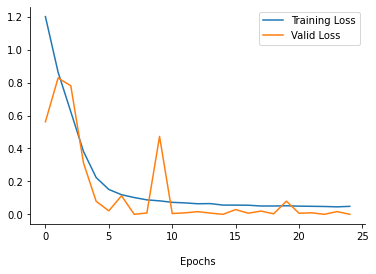

**Evaluation**

In [14]:
net = net.to(device) # needed if skipping training and only evaluating on pre-trained models

C:\Users\martin\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


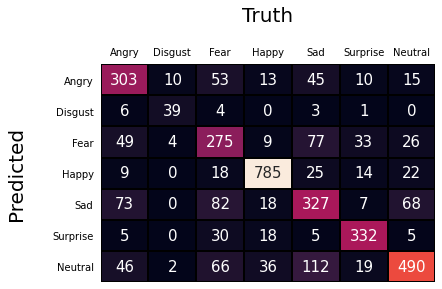

In [15]:
#create confusion matrix  - function automatically puts net in eval mode 
#NB can take several minutes to compile confusion matrix
conf_matrix = make_conf_matrix(net, testloader, device)  
plot_conf_matrix(conf_matrix)

In [16]:
#get evaluation metrics
get_eval_scores(conf_matrix)

Accuracy = 71.1 %


,Happy,Surprise,Disgust,Neutral,Angry,Sad,Fear
F1 Score,0.896,0.819,0.722,0.702,0.645,0.559,0.549
Precision,0.899,0.841,0.736,0.636,0.675,0.569,0.581
Recall,0.893,0.798,0.709,0.783,0.617,0.551,0.521
